# 1. Prepare Environment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load Dataset
Load the cleaned dataset from hw1.

In [2]:
data_dir = '.'
data_path = os.path.join(data_dir, 'hw1.csv')
df = pd.read_csv(data_path)

In [3]:
df

,age,sex,ord1,num1,num2,ord2,ord3,num3,ord4,num4,ord5,ord6,num5,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     303 non-null    int64  
 1   sex     303 non-null    int64  
 2   ord1    303 non-null    int64  
 3   num1    303 non-null    int64  
 4   num2    303 non-null    int64  
 5   ord2    303 non-null    int64  
 6   ord3    303 non-null    int64  
 7   num3    303 non-null    int64  
 8   ord4    303 non-null    int64  
 9   num4    303 non-null    float64
 10  ord5    303 non-null    int64  
 11  ord6    303 non-null    int64  
 12  num5    303 non-null    int64  
 13  target  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,ord1,num1,num2,ord2,ord3,num3,ord4,num4,ord5,ord6,num5,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 3. Data Preparation
According from the conclusion in hw1, the good variables that can be used to indicate the disease are 'ord1', 'ord4', and 'num4'. 

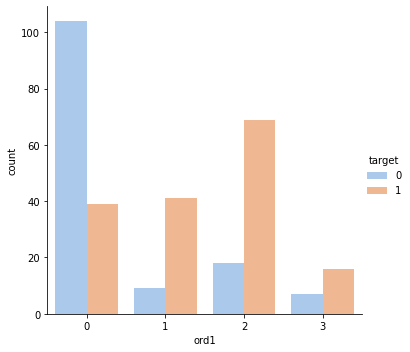

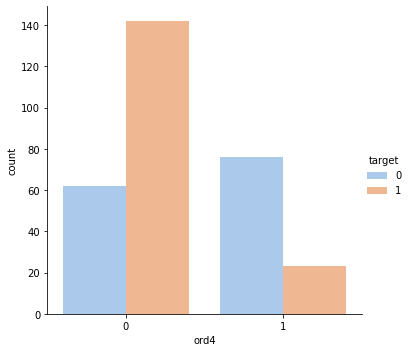

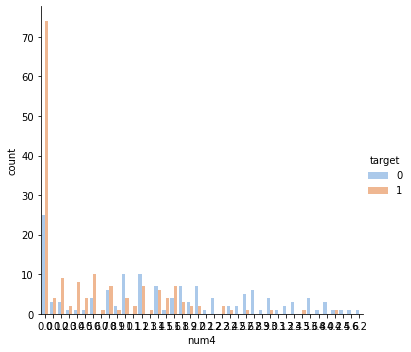

In [6]:
sns.catplot(
    data=df, hue='target',
    x='ord1', kind='count', palette='pastel')

sns.catplot(
    data=df, hue='target',
    x='ord4', kind='count', palette='pastel')

sns.catplot(
    data=df, hue='target',
    x='num4', kind='count', palette='pastel')

Form the experiment, I found that using only 3 variables above resulted in underfitting model. So, I decided to add another variable, which is 'ord5'.

In [7]:
data_df = df[['ord1','ord4','num4','ord5','target']]

In [8]:
data_df

,ord1,ord4,num4,ord5,target
0,3,0,2.3,0,1
1,2,0,3.5,0,1
2,1,0,1.4,2,1
3,1,0,0.8,2,1
4,0,1,0.6,2,1
...,...,...,...,...,...
298,0,1,0.2,1,0
299,3,0,1.2,1,0
300,0,0,3.4,1,0
301,0,1,1.2,1,0


# 4. Prepare Train/Valid/Test Sets 
I split the dataset into 80:20, which are used for cross-validation and testing respectively.

In [9]:
X = data_df.drop(columns=['target']).values
y = data_df['target'].values

In [10]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.20)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (242, 4), (242,)
Test set: (61, 4), (61,)


Additionally, I use RobustScaler to normalize the range of all features.

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
s_X_train = scaler.transform(X_train)

# 5. Model Selection 
To choose the model, I compare the cross-validation score of some models to observe which one has the best **recall** score. I use cross-validation method to evaluate the model because the size of the dataset is small and it helps on estimating the performance of the models on the unseen data.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [13]:
cross_val_score(LogisticRegression(),s_X_train,y_train,cv=5,scoring='recall').mean()

0.8350427350427351

In [14]:
cross_val_score(SVC(),X_train,y_train,cv=5,scoring='recall').mean()

0.9247863247863248

In [15]:
cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5,scoring='recall').mean()

0.8054131054131053

In [16]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=5,scoring='recall').mean()

0.7227920227920228

In [17]:
cross_val_score(KNeighborsClassifier(n_neighbors=11),X_train,y_train,cv=5,scoring='recall').mean()

0.9017094017094017

We can see that the **C-Support Vector Classification** model has the best recall score. So, this model is the chosen one.

To find the hyperparameter of SVC model, I use optuna to find the best value of 'c' within 10 trials.

In [18]:
import sklearn

import optuna

# 1. Define an objective function to be maximized.
def objective(trial):

    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('classifier', ['SVC','RandomForest'])
    if classifier_name == 'SVC':
         svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
         classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='scale')
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
        
    score = sklearn.model_selection.cross_val_score(classifier_obj, s_X_train, y_train, n_jobs=-1, cv=5, scoring='recall')
    accuracy = score.mean()
    return accuracy

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2021-03-08 23:41:28,451] A new study created in memory with name: no-name-3586ad3d-39da-42d0-8dd0-b96bf7f3d6f5
[I 2021-03-08 23:41:30,086] Trial 0 finished with value: 1.0 and parameters: {'classifier': 'SVC', 'svc_c': 1.4934546899768562e-09}. Best is trial 0 with value: 1.0.
[I 2021-03-08 23:41:30,859] Trial 1 finished with value: 1.0 and parameters: {'classifier': 'SVC', 'svc_c': 2.5903701263870657e-06}. Best is trial 0 with value: 1.0.
[I 2021-03-08 23:41:31,516] Trial 2 finished with value: 0.8356125356125357 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 4.979882631763791}. Best is trial 0 with value: 1.0.
[I 2021-03-08 23:41:31,531] Trial 3 finished with value: 1.0 and parameters: {'classifier': 'SVC', 'svc_c': 5.9305362944100385e-08}. Best is trial 0 with value: 1.0.
[I 2021-03-08 23:41:31,555] Trial 4 finished with value: 0.917094017094017 and parameters: {'classifier': 'SVC', 'svc_c': 0.90076874211021}. Best is trial 0 with value: 1.0.
[I 2021-03-08 23:41:31

In [25]:
model = SVC(C=1)
model = model.fit(s_X_train, y_train)

In [26]:
y_hat_train = model.predict(s_X_train)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.2f}')

Training Set
[[ 72  37]
 [  8 125]]
Accuracy: 0.81
Precision: 0.77
Recall: 0.94
F1-score: 0.85


# 6. Evaluation on Test Set
Finally, we evaluate the model by the **recall** score using the designed test set. I use recall score as a performance metric because FP is less important in this case, which is the case that a patient does not has disease but predict having disease. In other words, the case that a patient has disease but predict having no disease is more important.

In [28]:
s_X_test = scaler.transform(X_test)
y_hat_test = model.predict(s_X_test)

In [29]:
print('Test Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.2f}')

Test Set
Accuracy: 0.77
Precision: 0.75
Recall: 0.84
F1-score: 0.79
